In [1]:
import numpy as np
import cv2, pickle
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop 
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
data_file = "./png-etl1/katakana.pickle"
im_size = 25
out_size = 46 
im_color = 1 
in_shape = (im_size, im_size, im_color)

In [3]:
data = pickle.load(open(data_file, "rb"))

In [4]:
y = []
x = []
for d in data:
    (num, img) = d
    img = img.astype('float').reshape(
      im_size, im_size, im_color) / 255
    y.append(keras.utils.to_categorical(num, out_size))
    x.append(img)
x = np.array(x)
y = np.array(y)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, train_size = 0.8, shuffle = True)

In [6]:
model = Sequential()
model.add(Conv2D(32,
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

In [7]:
hist = model.fit(x_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
433/433 [==============================] - 59s 134ms/step - loss: 2.6454 - accuracy: 0.3033 - val_loss: 0.6873 - val_accuracy: 0.8212
Epoch 2/12
433/433 [==============================] - 59s 137ms/step - loss: 0.8965 - accuracy: 0.7293 - val_loss: 0.4594 - val_accuracy: 0.8738
Epoch 3/12
433/433 [==============================] - 56s 130ms/step - loss: 0.6449 - accuracy: 0.8056 - val_loss: 0.3381 - val_accuracy: 0.9125
Epoch 4/12
433/433 [==============================] - 57s 131ms/step - loss: 0.5173 - accuracy: 0.8473 - val_loss: 0.2797 - val_accuracy: 0.9246
Epoch 5/12
433/433 [==============================] - 56s 130ms/step - loss: 0.4454 - accuracy: 0.8689 - val_loss: 0.2569 - val_accuracy: 0.9376
Epoch 6/12
433/433 [==============================] - 57s 133ms/step - loss: 0.4044 - accuracy: 0.8840 - val_loss: 0.2097 - val_accuracy: 0.9454
Epoch 7/12
433/433 [==============================] - 58s 134ms/step - loss: 0.3630 - accuracy: 0.8971 - val_loss: 0.1955 - val_ac

In [8]:
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

433/433 [==============================] - 4s 10ms/step - loss: 0.1792 - accuracy: 0.9577
正解率= 0.9576945304870605 loss= 0.17917358875274658


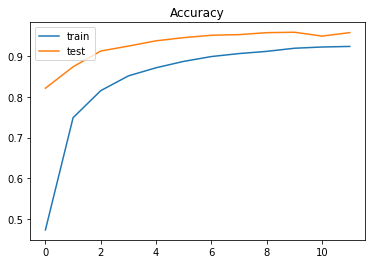

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

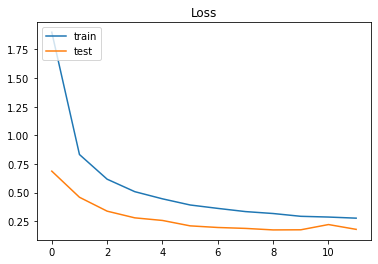

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()